# **Exercises 3, part 2/2**. Matplotlib

- Consider the data of the populations.txt file and
    - create a figure with three axes containing the three variables' time series, with their corresponding titles and labels, and highlighting the years with values above/below the average in that period in Red Blue.
    - create a second figure equivalent to the previous one but considering the median instead of the mean.
- Reproduce at least eight out of the twelve examples from the tutorial.

Submit the code and figures examples in a Jupyter notebook (also submit the .html).

## Consider the data of the populations.txt file

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dat = np.loadtxt("populations.txt")

Y = dat[:,0]
H = dat[:,1]
L = dat[:,2]
C = dat[:,3]

mean = dat[:,1:].sum(axis = 0)/dat[:,0].size
std = np.std(dat[:,1:], axis=0)

from tabulate import tabulate

data = {'Value': ['Mean', 'Median'], 
        'Hares': [mean[0], np.median(H)],
        'Lynx': [mean[1], np.median(L)],
        'Carrots': [mean[2], np.median(C)]}
  
print(tabulate(data, headers='keys',tablefmt='fancy_grid'))

╒═════════╤═════════╤═════════╤═══════════╕
│ Value   │   Hares │    Lynx │   Carrots │
╞═════════╪═════════╪═════════╪═══════════╡
│ Mean    │   34081 │ 20166.7 │     42400 │
├─────────┼─────────┼─────────┼───────────┤
│ Median  │   25400 │ 12300   │     41800 │
╘═════════╧═════════╧═════════╧═══════════╛


### Create a figure with three axes containing the three variables' time series, with their corresponding titles and labels, and highlighting the years with values above/below the average in that period in Red Blue.

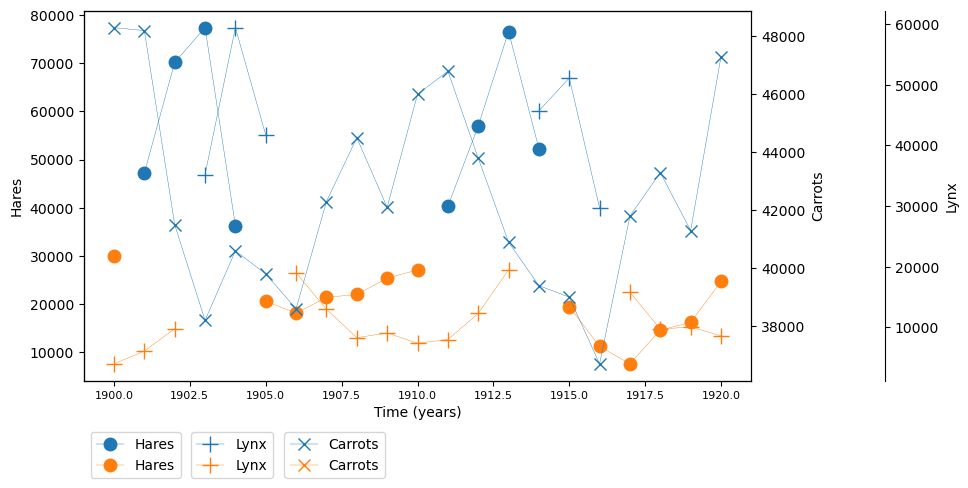

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

upper1 =  mean[0]
lower1 =  mean[0]

upper2 =  mean[1]
lower2 =  mean[1]

upper3 =  mean[2]
lower3 =  mean[2]

supper1 = np.ma.masked_where(H < upper1, H)
slower1 = np.ma.masked_where(H > lower1, H)

supper2 = np.ma.masked_where(L < upper2, L)
slower2 = np.ma.masked_where(L > lower2, L)

supper3 = np.ma.masked_where(C < upper2, C)
slower3 = np.ma.masked_where(C > lower2, C)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax2.spines.right.set_position(("axes", 1.2))

ax1.plot(Y, supper1, Y, slower1, marker='o',linewidth=0.3, markersize = 9, label = 'Hares')
ax2.plot(Y, supper2, Y, slower2, marker='+',linewidth=0.3, markersize = 12, label = 'Lynx')
ax3.plot(Y, supper3, Y, slower3, marker='x',linewidth=0.3, markersize = 9, label = 'Carrots')

ax1.set_xlabel("Time (years)")
ax1.set_ylabel("Hares")
ax2.set_ylabel("Lynx")
ax3.set_ylabel("Carrots")

ax1.tick_params(axis='x', which='major', labelsize=8)

ax1.legend(bbox_to_anchor=(0, -0.12),loc='upper left')
ax2.legend(bbox_to_anchor=(0.15, -0.12),loc='upper left')
ax3.legend(bbox_to_anchor=(0.29, -0.12),loc='upper left')

plt.show()

### Create a second figure equivalent to the previous one but considering the median instead of the mean.

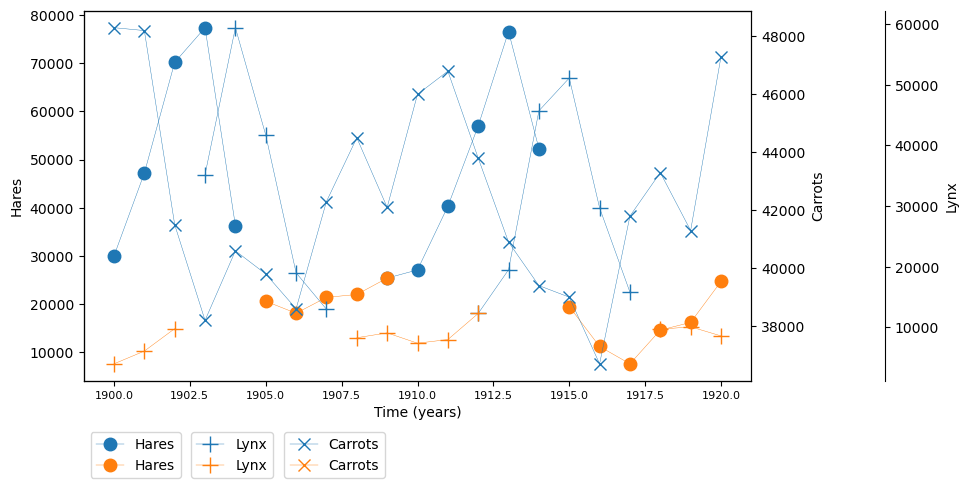

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

upper1 =  np.median(H)
lower1 =  np.median(H)

upper2 =  np.median(L)
lower2 =  np.median(L)

upper3 =  np.median(C)
lower3 =  np.median(C)

supper1 = np.ma.masked_where(H < upper1, H)
slower1 = np.ma.masked_where(H > lower1, H)

supper2 = np.ma.masked_where(L < upper2, L)
slower2 = np.ma.masked_where(L > lower2, L)

supper3 = np.ma.masked_where(C < upper2, C)
slower3 = np.ma.masked_where(C > lower2, C)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax2.spines.right.set_position(("axes", 1.2))

ax1.plot(Y, supper1, Y, slower1, marker='o',linewidth=0.3, markersize = 9, label = 'Hares')
ax2.plot(Y, supper2, Y, slower2, marker='+',linewidth=0.3, markersize = 12, label = 'Lynx')
ax3.plot(Y, supper3, Y, slower3, marker='x',linewidth=0.3, markersize = 9, label = 'Carrots')

ax1.set_xlabel("Time (years)")
ax1.set_ylabel("Hares")
ax2.set_ylabel("Lynx")
ax3.set_ylabel("Carrots")

ax1.tick_params(axis='x', which='major', labelsize=8)

ax1.legend(bbox_to_anchor=(0, -0.12),loc='upper left')
ax2.legend(bbox_to_anchor=(0.15, -0.12),loc='upper left')
ax3.legend(bbox_to_anchor=(0.29, -0.12),loc='upper left')

plt.show()

## Reproduce at least eight out of the twelve examples from the tutorial.

### 1. Contour plot

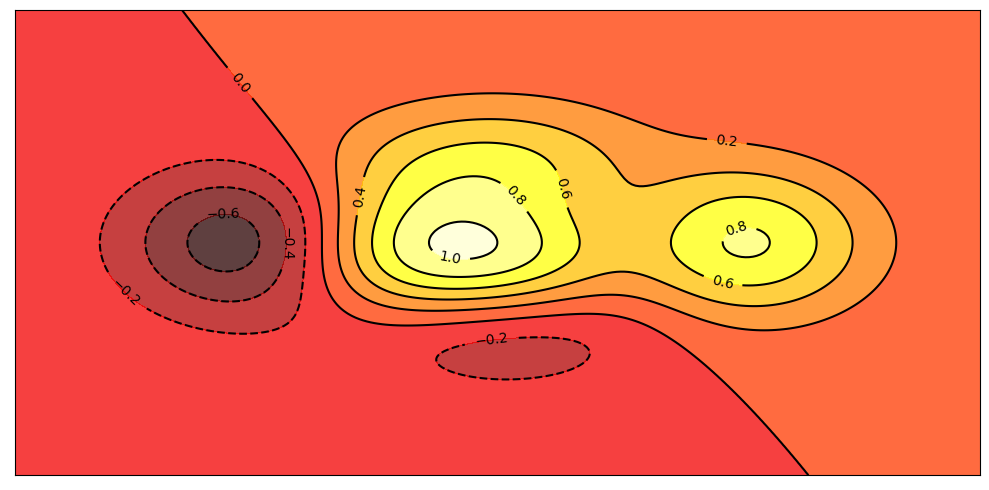

In [6]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X, Y), 8, colors='black')

plt.clabel(C, fontsize=10)
plt.xticks([])
plt.yticks([])

plt.show()

### 2. Imshow

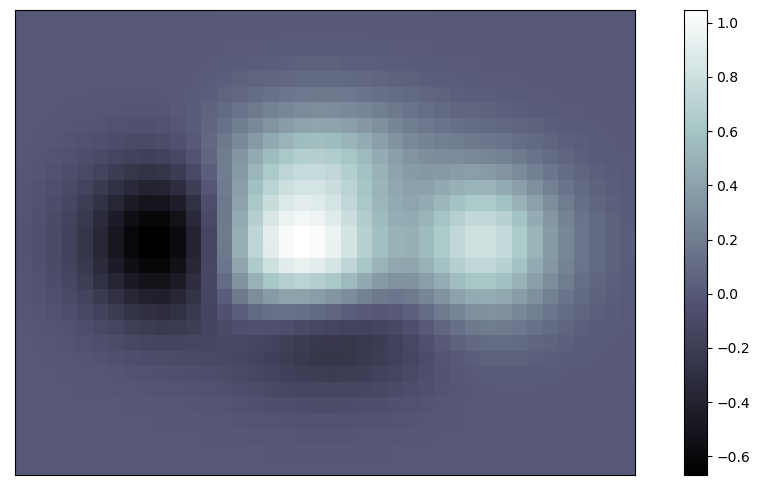

In [7]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

n = 10
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 3 * n)
X, Y = np.meshgrid(x, y)
plt.imshow(f(X, Y),interpolation='nearest', cmap='bone', origin='lower')
plt.colorbar()

plt.xticks([])
plt.yticks([])
plt.show()

### 3. Pie charts

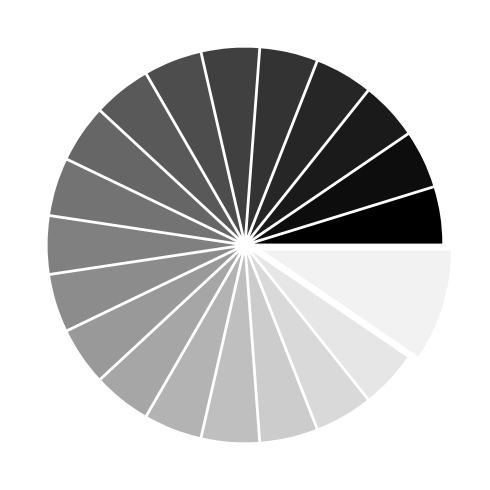

In [8]:
# NO IDEA WHAT THIS IS FOR:
# Z[-1] *= 2

n = 20
Z = np.ones(n)
Z[-1] *= 2

plt.pie(Z, explode=Z*.05, colors = ['%f' % (i/float(n)) for i in range(n)])

plt.show()

### 4. Polar Axis

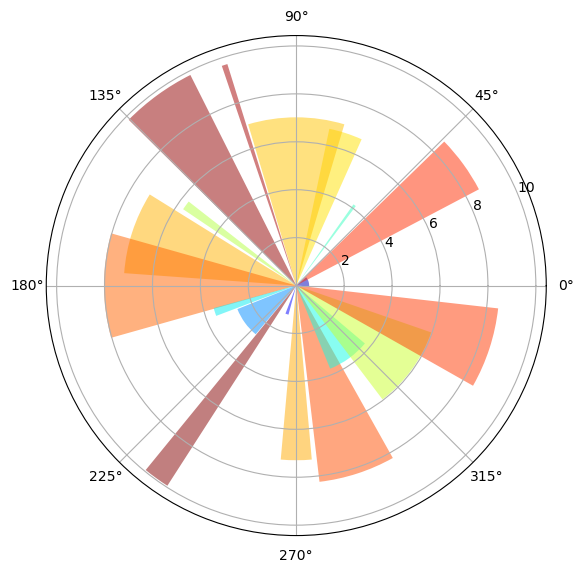

In [12]:
plt.axes([0, 0, 1, 1], polar = True)

N = 20
theta = np.arange(0., 2 * np.pi, 2 * np.pi / N)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)
    
plt.show()

### 5. 3D Plots

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)

plt.show()

# For some reason this does not work

<Figure size 1000x500 with 0 Axes>

### 5 (bis). Text

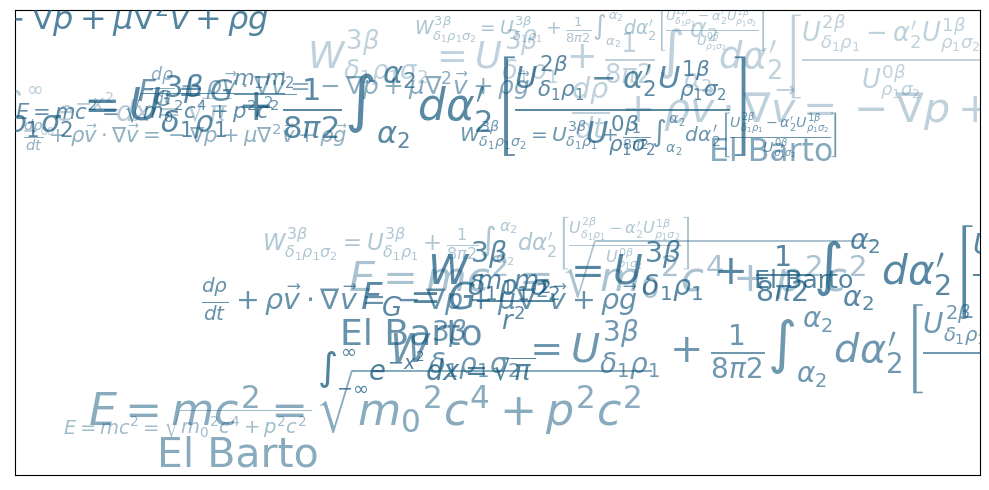

In [16]:
eqs = []
eqs.append((r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$"))
eqs.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} = -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$"))
eqs.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$"))
eqs.append((r"$E = mc^2 = \sqrt{{m_0}^2c^4 + p^2c^2}$"))
eqs.append((r"$F_G = G\frac{m_1m_2}{r^2}$"))
eqs.append((r"El Barto"))

for i in range(24):
    index = np.random.randint(0, len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12, 32)
    x,y = np.random.uniform(0, 1, 2)
    alpha = np.random.uniform(0.25, .75)
    
    plt.text(x, y, eq, ha='center', va='center', color="#11557c", alpha=alpha,
         transform=plt.gca().transAxes, fontsize=size, clip_on=True)
    
plt.xticks([])
plt.yticks([])

plt.show()

### 6. Scatter Plots

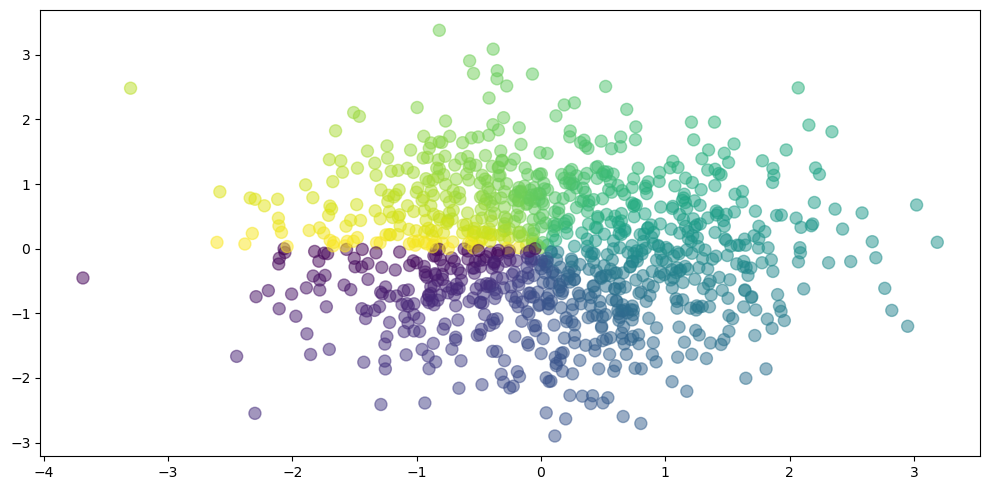

In [17]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

# The arctan calculates the angle choosing the quadrant properly.
# col = np.arctan(Y/X)
col = np.arctan2(Y,X)

# s is size, alpha is, well, the alpha (transparency)
plt.scatter(X,Y,c = col, s=75, alpha=.5)

### 7. Quiver Plots

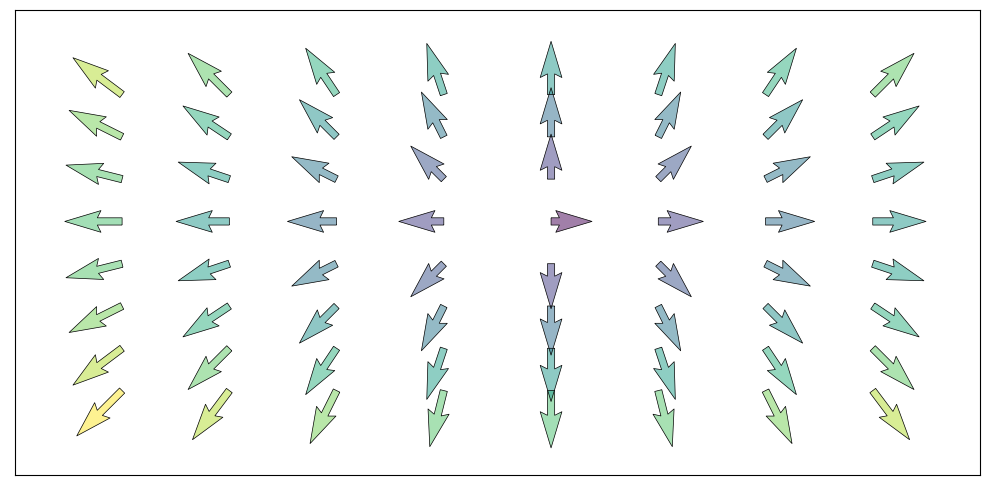

In [18]:
n = 8
X, Y = np.mgrid[0:n, 0:n]

# Angle
T = np.arctan2(Y - n / 2., X - n/2.)

# Module based on the radius
R = 10 + np.sqrt((Y - n / 2.0) ** 2 + (X - n / 2.0) ** 2)

# Such a great of way of writing it
U, V = R * np.cos(T), R * np.sin(T)

# Vectors colored according to the angle and with module dependent on V
plt.quiver(X, Y, U, V, R, alpha=.5)

# Only the edge of the vectors
plt.quiver(X, Y, U, V, edgecolor='k', facecolor='None', linewidth=.5)

plt.xlim(-1, n)
plt.xticks([])
plt.ylim(-2, n+1)
plt.yticks([])

plt.show()

### 8. Bar Plots

(-1.25, 1.25)

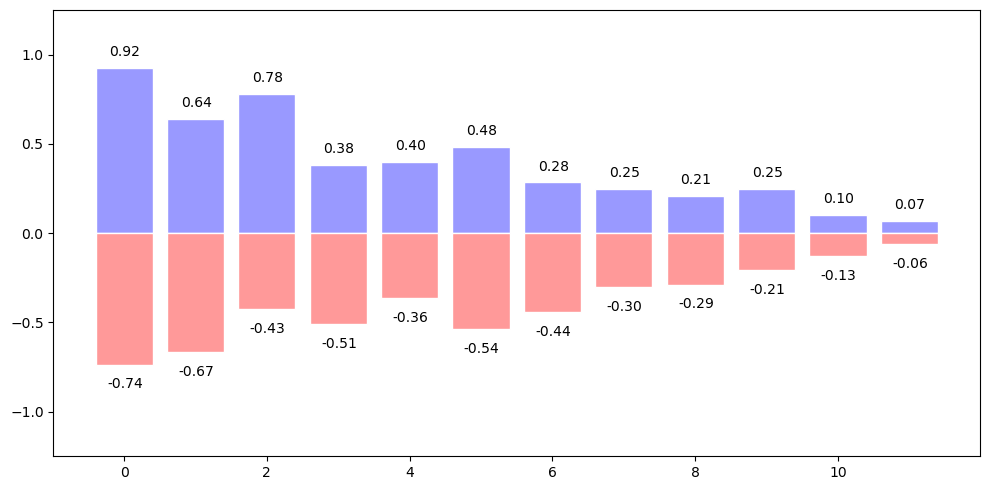

In [19]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x + 0.01, y + 0.05, '%.2f' % y, ha='center', va='bottom')
    
for x, y in zip(X, -Y2):
    plt.text(x + 0.01, y - 0.15, '%.2f' % y, ha='center', va='bottom')

plt.ylim(-1.25, +1.25)